<a href="https://colab.research.google.com/github/EmilDragola/4KyrsNeiroseti/blob/master/NeirosetiPrakticheskaya7.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Практическая работа №7. Использование автоэнкодера для решения задач семантической сегментации. Часть 1**

# Этап 1. Выбор и обработка исходных данных. Разделение на обучающую и тестовую выборку

# Разделение данных по папкам на обучающую и проверочную выборку (после разделения снимка и маски на патчи)


Ниже представлен Код для разделения папки на train и val.
После создания новых папок переименуйте их и расположите в формате, приведенном ниже, для использования для семантической сегментации с помощью генераторов данных. 

[Документация](https://pypi.org/project/split-folders/) 

### Подсказка

In [ ]:
!pip install split-folders


In [ ]:
import splitfolders  # or import split_folders

input_folder = r'C:\Users\sa32\YandexDisk\VIZARD\256_patches\images_with_useful_info\\'
output_folder = r'C:\Users\sa32\YandexDisk\VIZARD\data_for_training_and_testing\\'

splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.75, .25), group_prefix=None) # default values

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras

from matplotlib import pyplot as plt
from patchify import patchify
from PIL import Image

tf.compat.v1.enable_eager_execution()
import segmentation_models as sm
from keras.metrics import MeanIoU

from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()

Segmentation Models: using `keras` framework.


In [ ]:
root_directory = '/content/drive/MyDrive/Semantic segmentation dataset/'

patch_size = 256

In [ ]:
image_dataset = []  
for path, subdirs, files in os.walk(root_directory):
    print(path)  
    dirname = path.split(os.path.sep)[-1]
    if dirname == 'images':   
        images = os.listdir(path)
        for i, image_name in enumerate(images):  
            if image_name.endswith(".jpg"):   
                image = cv2.imread(path+"/"+image_name, 1)  
                SIZE_X = (image.shape[1]//patch_size)*patch_size 
                SIZE_Y = (image.shape[0]//patch_size)*patch_size  
                image = Image.fromarray(image)
                image = image.crop((0 ,0, SIZE_X, SIZE_Y))  
                image = np.array(image)             
       
                # Разделяем изображение на части
                print("Now patchifying image:", path+"/"+image_name)
                patches_img = patchify(image, (patch_size, patch_size, 3), step=patch_size)  #Step=256 for 256 patches means no overlap
        
                for i in range(patches_img.shape[0]):
                    for j in range(patches_img.shape[1]):
                        
                        single_patch_img = patches_img[i,j,:,:]
                        single_patch_img = single_patch_img[0] # Убираем лишние ненужные каналы, которые добавляет patchify.                              
                        # image_dataset.append(single_patch_img)
          
                        cv2.imwrite(root_directory+"Image/" + image_name + 
                                   "_patch_" + str(i) + str(j) + ".jpg", single_patch_img)

/content/drive/MyDrive/Semantic segmentation dataset/
/content/drive/MyDrive/Semantic segmentation dataset/Tile 8
/content/drive/MyDrive/Semantic segmentation dataset/Tile 8/images
Now patchifying image: /content/drive/MyDrive/Semantic segmentation dataset/Tile 8/images/image_part_001.jpg
Now patchifying image: /content/drive/MyDrive/Semantic segmentation dataset/Tile 8/images/image_part_009.jpg
Now patchifying image: /content/drive/MyDrive/Semantic segmentation dataset/Tile 8/images/image_part_005.jpg
Now patchifying image: /content/drive/MyDrive/Semantic segmentation dataset/Tile 8/images/image_part_007.jpg
Now patchifying image: /content/drive/MyDrive/Semantic segmentation dataset/Tile 8/images/image_part_003.jpg
Now patchifying image: /content/drive/MyDrive/Semantic segmentation dataset/Tile 8/images/image_part_002.jpg
Now patchifying image: /content/drive/MyDrive/Semantic segmentation dataset/Tile 8/images/image_part_008.jpg


KeyboardInterrupt: ignored

In [ ]:
mask_dataset = []  
for path, subdirs, files in os.walk(root_directory):
    #print(path)  
    dirname = path.split(os.path.sep)[-1]
    if dirname == 'masks': 
        masks = os.listdir(path)  
        for i, mask_name in enumerate(masks):  
            if mask_name.endswith(".png"):  
               
                mask = cv2.imread(path+"/"+mask_name, 1)
                SIZE_X = (mask.shape[1]//patch_size)*patch_size
                SIZE_Y = (mask.shape[0]//patch_size)*patch_size
                mask = Image.fromarray(mask)
                mask = mask.crop((0 ,0, SIZE_X, SIZE_Y))
                mask = np.array(mask)             
       
                print("Now patchifying mask:", path+"/"+mask_name)
                patches_mask = patchify(mask, (patch_size, patch_size, 3), step=patch_size)
        
                for i in range(patches_mask.shape[0]):
                    for j in range(patches_mask.shape[1]):
                        
                        single_patch_mask = patches_mask[i,j,:,:]
                        single_patch_mask = single_patch_mask[0]                               

                        cv2.imwrite(root_directory+"Masks/" + mask_name + 
                                   "_patch_" + str(i) + str(j) + ".png", single_patch_mask)

Now patchifying mask: /content/drive/MyDrive/Semantic segmentation dataset/Tile 8/masks/image_part_003.png
Now patchifying mask: /content/drive/MyDrive/Semantic segmentation dataset/Tile 8/masks/image_part_006.png
Now patchifying mask: /content/drive/MyDrive/Semantic segmentation dataset/Tile 8/masks/image_part_005.png
Now patchifying mask: /content/drive/MyDrive/Semantic segmentation dataset/Tile 8/masks/image_part_004.png
Now patchifying mask: /content/drive/MyDrive/Semantic segmentation dataset/Tile 8/masks/image_part_002.png
Now patchifying mask: /content/drive/MyDrive/Semantic segmentation dataset/Tile 8/masks/image_part_009.png
Now patchifying mask: /content/drive/MyDrive/Semantic segmentation dataset/Tile 8/masks/image_part_008.png
Now patchifying mask: /content/drive/MyDrive/Semantic segmentation dataset/Tile 8/masks/image_part_007.png
Now patchifying mask: /content/drive/MyDrive/Semantic segmentation dataset/Tile 8/masks/image_part_001.png
Now patchifying mask: /content/drive/

KeyboardInterrupt: ignored

In [ ]:
train_img_dir = r'/content/drive/MyDrive/Semantic segmentation dataset/Data/Image/'
train_mask_dir = r'/content/drive/MyDrive/Semantic segmentation dataset/Data/Masks/'

# val_img_dir = r'/content/drive/MyDrive/Semantic segmentation dataset/Val_Image/'
# val_mask_dir = r'/content/drive/MyDrive/Semantic segmentation dataset/Val_Masks/'

In [ ]:
img_list = sorted(os.listdir(train_img_dir))
msk_list = sorted(os.listdir(train_mask_dir))
# val_img_list = sorted(os.listdir(val_img_dir))
# val_msk_list = sorted(os.listdir(val_mask_dir))
num_images = len(os.listdir(train_img_dir))
# num_img = len(os.listdir(val_img_dir))

print(num_images)

549


<Figure size 1200x800 with 0 Axes>

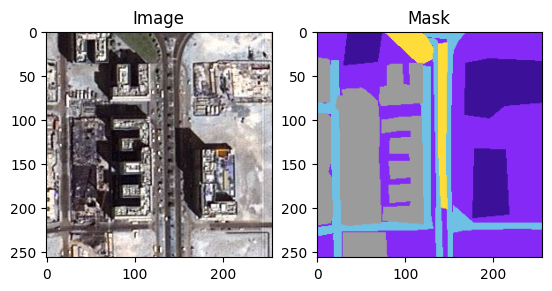

<Figure size 1200x800 with 0 Axes>

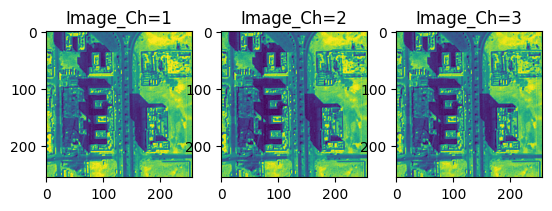

<Figure size 1200x800 with 0 Axes>

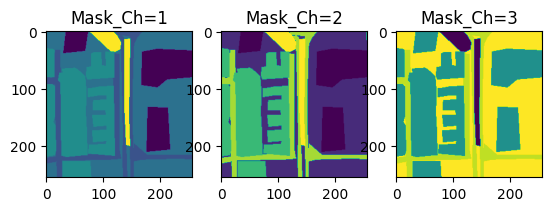

In [ ]:
import random

img_num = random.randint(0, num_images-1)

img_for_plot = cv2.imread(train_img_dir+img_list[img_num])
img_for_plot = cv2.cvtColor(img_for_plot, cv2.COLOR_BGR2RGB)

mask_for_plot =cv2.imread(train_mask_dir+msk_list[img_num])
mask_for_plot = cv2.cvtColor(mask_for_plot, cv2.COLOR_BGR2RGB)

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
 
figure, axis = plt.subplots(1, 2)

axis[0].imshow(img_for_plot, cmap=plt.get_cmap('gray'),vmin=0,vmax=100)
axis[0].set_title('Image')

axis[1].imshow(mask_for_plot)
axis[1].set_title('Mask')

plt.show()

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
 
figure, axis = plt.subplots(1, 3)

axis[0].imshow(img_for_plot[:,:,0])
axis[0].set_title('Image_Ch=1')

axis[1].imshow(img_for_plot[:,:,1])
axis[1].set_title('Image_Ch=2')

axis[2].imshow(img_for_plot[:,:,2])
axis[2].set_title('Image_Ch=3')

plt.show()

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
 
figure, axis = plt.subplots(1, 3)

axis[0].imshow(mask_for_plot[:,:,0])
axis[0].set_title("Mask_Ch=1")

axis[1].imshow(mask_for_plot[:,:,1])
axis[1].set_title("Mask_Ch=2")

axis[2].imshow(mask_for_plot[:,:,2])
axis[2].set_title("Mask_Ch=3")

plt.show()


Структура конечных папок для генератора (ImageDataGenerator()): 

(После разделения на папки, нужно разместить вручную или написать для этого специальную функцию, например, используя модули os и/или shutil)



```
dataset
        train_image
                    train
        train_mask
                    train
        val_image
                    val
        val_mask
                    val
```



#.

In [ ]:
import splitfolders  # or import split_folders

input_folder = r'/content/drive/MyDrive/Semantic segmentation dataset/Data'
output_folder = r'/content/drive/MyDrive/Semantic segmentation dataset/NewData/'

splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.75, .25), group_prefix=None) # default values

Copying files: 6 files [00:02,  2.81 files/s]

KeyboardInterrupt: ignored

In [ ]:
import os
print(len(os.listdir('/content/drive/MyDrive/Semantic segmentation dataset/NewData/train_image/train/')))
print(len(os.listdir('/content/drive/MyDrive/Semantic segmentation dataset/NewData/train_mask/mask')))

print(len(os.listdir('/content/drive/MyDrive/Semantic segmentation dataset/NewData/val_image/train')))
print(len(os.listdir('/content/drive/MyDrive/Semantic segmentation dataset/NewData/val_mask/mask')))

411
411
138
138


# Этап 2. Предобработка обучающей и валидационной выборки. Разработка архитектуры модели

In [ ]:
#Convert HEX to RGB array
import numpy as np

Building = '#3C1098'.lstrip('#')
Building = np.array(tuple(int(Building[i:i+2], 16) for i in (0, 2, 4))) # 60, 16, 152

Land = '#8429F6'.lstrip('#')
Land = np.array(tuple(int(Land[i:i+2], 16) for i in (0, 2, 4))) #132, 41, 246

Road = '#6EC1E4'.lstrip('#') 
Road = np.array(tuple(int(Road[i:i+2], 16) for i in (0, 2, 4))) #110, 193, 228

Vegetation =  'FEDD3A'.lstrip('#') 
Vegetation = np.array(tuple(int(Vegetation[i:i+2], 16) for i in (0, 2, 4))) #254, 221, 58

Water = 'E2A929'.lstrip('#') 
Water = np.array(tuple(int(Water[i:i+2], 16) for i in (0, 2, 4))) #226, 169, 41

Unlabeled = '#9B9B9B'.lstrip('#') 
Unlabeled = np.array(tuple(int(Unlabeled[i:i+2], 16) for i in (0, 2, 4))) #155, 155, 155

In [ ]:
def rgb_to_2D_label(label):
    """
    Замена значений каждого пикселя маски в формате RGB на целое число 
    
    """

    if len(label.shape) == 3: 
        label = label[:,:,:3]
    if len(label.shape) == 4: 
        label = label[:,:,:,:3]

    label_seg = np.zeros(label.shape,dtype=np.uint8)
    label_seg [np.all(label == Building,axis=-1)] = 0
    label_seg [np.all(label==Land,axis=-1)] = 1
    label_seg [np.all(label==Road,axis=-1)] = 2
    label_seg [np.all(label==Vegetation,axis=-1)] = 3
    label_seg [np.all(label==Water,axis=-1)] = 4
    label_seg [np.all(label==Unlabeled,axis=-1)] = 5

    if len(label.shape) == 3: 
        label_seg = label_seg[:,:,0]
    if len(label.shape) == 4: 
        label_seg = label_seg[:,:,:,0]
        
    return label_seg

In [ ]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from keras.utils import to_categorical

#Use this to preprocess input for transfer learning
BACKBONE = 'resnet34'
preprocess_input = sm.get_preprocessing(BACKBONE)

def preprocess_data(img, mask, num_class):
    img = scaler.fit_transform(img.reshape(-1, img.shape[-1])).reshape(img.shape)
    img = preprocess_input(img) 
    mask = rgb_to_2D_label(mask)
    mask = to_categorical(mask, num_class)
      
    return (img, mask)

In [ ]:
seed=24
batch_size= 16
n_classes=6

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
def trainGenerator(train_img_path, train_mask_path, num_class):
    
    img_data_gen_args = dict(horizontal_flip=True,
                      vertical_flip=True)
    
    image_datagen = ImageDataGenerator(**img_data_gen_args)
    mask_datagen = ImageDataGenerator(**img_data_gen_args)
    
    image_generator = image_datagen.flow_from_directory(
        train_img_path,
        class_mode = None,
        batch_size = batch_size,
        seed = seed)
    
    mask_generator = mask_datagen.flow_from_directory(
        train_mask_path,
        class_mode = None,
        batch_size = batch_size,
        seed = seed)
    
    train_generator = zip(image_generator, mask_generator)
    
    for (img, mask) in train_generator:
        img, mask = preprocess_data(img, mask, num_class)
        yield (img, mask)

In [ ]:
train_img_path = r'/content/drive/MyDrive/Semantic segmentation dataset/NewData/train_image/'
train_mask_path = r'/content/drive/MyDrive/Semantic segmentation dataset/NewData/train_mask/'

train_img_gen = trainGenerator(train_img_path, train_mask_path, num_class=6)

val_img_path = r'/content/drive/MyDrive/Semantic segmentation dataset/NewData/val_image/'
val_mask_path = r'/content/drive/MyDrive/Semantic segmentation dataset/NewData/val_mask/'
val_img_gen = trainGenerator(val_img_path, val_mask_path, num_class=6)

Found 411 images belonging to 1 classes.
Found 411 images belonging to 1 classes.


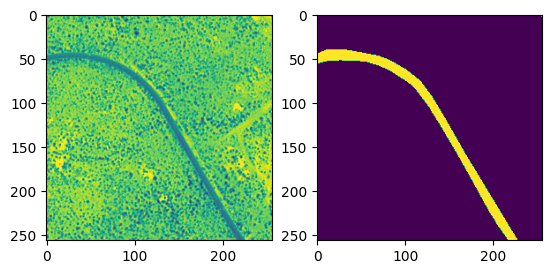

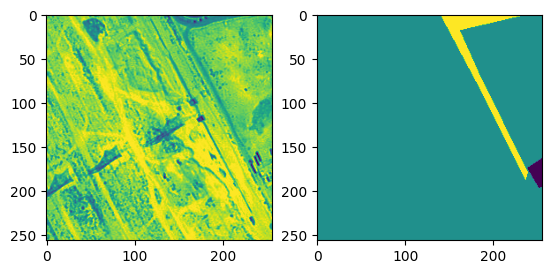

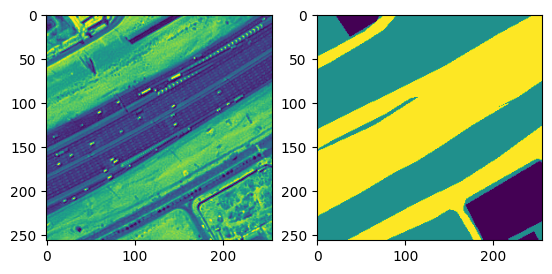

Found 138 images belonging to 1 classes.
Found 138 images belonging to 1 classes.


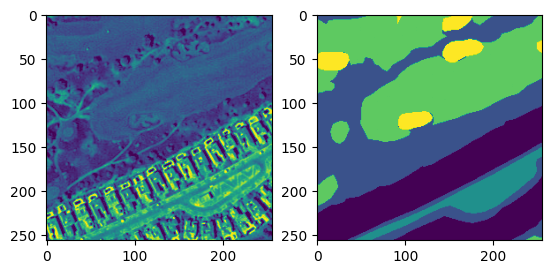

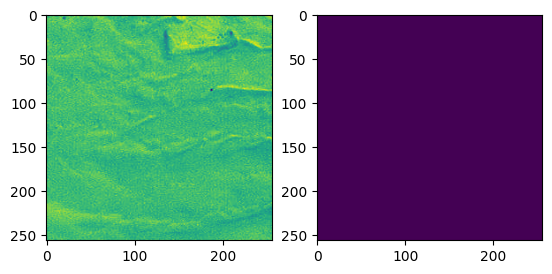

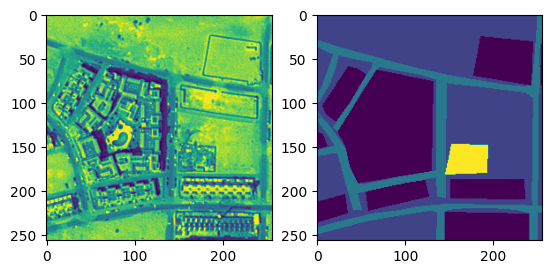

Unique labels in label dataset are:  [0 1 2 5]


In [ ]:
x, y = train_img_gen.__next__()

for i in range(0,3):
    image = x[i][:,:,0]
    mask = np.argmax(y[i], axis=2)
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.subplot(1,2,2)
    plt.imshow(mask)
    plt.show()

x_val, y_val = val_img_gen.__next__()

for i in range(0,3):
    image = x_val[i][:,:,0]
    mask = np.argmax(y_val[i], axis=2)
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.subplot(1,2,2)
    plt.imshow(mask)
    plt.show()

labels, count = np.unique(mask, return_counts=True) #Check for each channel. All chanels are identical

print("Unique labels in label dataset are: ", np.unique(labels))

In [ ]:
import os
num_train_imgs = len(os.listdir(r'/content/drive/MyDrive/Semantic segmentation dataset/NewData/train_image/train/'))
num_val_images = len(os.listdir(r'/content/drive/MyDrive/Semantic segmentation dataset/NewData/val_mask/mask/'))
steps_per_epoch = num_train_imgs//batch_size
val_steps_per_epoch = num_val_images//batch_size

IMG_HEIGHT = x.shape[1]
IMG_WIDTH = x.shape[2]
IMG_CHANNELS = x.shape[3]

n_classes=6

print(num_train_imgs, steps_per_epoch, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)
print(num_train_imgs, num_val_images, steps_per_epoch, val_steps_per_epoch, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

411 25 256 256 3
411 138 25 8 256 256 3


# Этап 3. Обучение модели

* Изучите техническую докуентацию по работе с модулем [Segmentation Models](https://segmentation-models.readthedocs.io/en/latest/tutorial.html)

* Последовательно обучите несколько моделей, используя при этом разные [функции потерь ](https://segmentation-models.readthedocs.io/en/latest/api.html#losses)

> [Реализация всех имеющихся в модуле функций потерь на GIT разработчиков](https://github.com/qubvel/segmentation_models/blob/master/segmentation_models/losses.py)

* При обучении используйте несколько метрик [метрик](https://segmentation-models.readthedocs.io/en/latest/api.html#metrics), определив их в массиве.



Пример:

```
metrics = ['accuracy', sm.metrics.iou_score]

model.compile('Adam', loss=sm.losses.categorical_focal_jaccard_loss, metrics=metrics)
```
> [Реализация всех имеющихся в модуле метрик на GIT разработчиков](https://github.com/qubvel/segmentation_models/blob/master/segmentation_models/metrics.py)



# Этап 4. Визуализация процесса обучения. Оценка точности

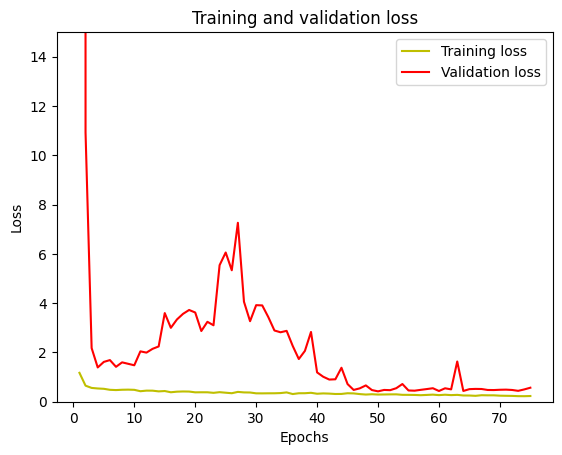

In [ ]:
history = history1
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.ylim(bottom=0, top=15)
plt.show()

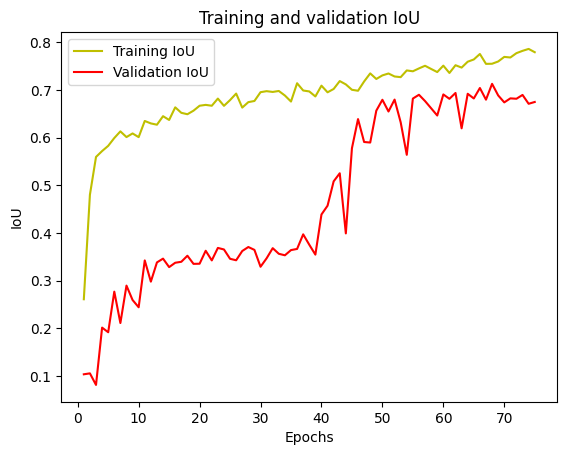

In [ ]:
acc = history.history['jacard_coef']
val_acc = history.history['val_jacard_coef']

plt.plot(epochs, acc, 'y', label='Training IoU')
plt.plot(epochs, val_acc, 'r', label='Validation IoU')
plt.title('Training and validation IoU')
plt.xlabel('Epochs')
plt.ylabel('IoU')
plt.legend()
plt.show()

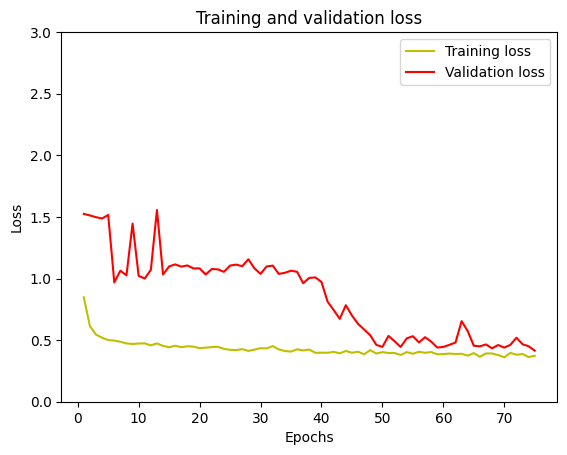

In [ ]:
history = history_FocalJL
loss = history_FocalJL.history['loss']
val_loss = history_FocalJL.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.ylim(bottom=0, top=3)
plt.show()

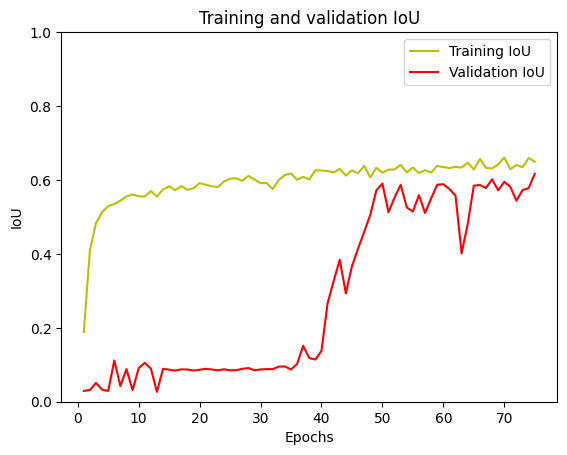

In [ ]:
acc = history.history['iou_score']
val_acc = history.history['val_iou_score']

plt.plot(epochs, acc, 'y', label='Training IoU')
plt.plot(epochs, val_acc, 'r', label='Validation IoU')
plt.title('Training and validation IoU')
plt.xlabel('Epochs')
plt.ylabel('IoU')
plt.legend()
plt.ylim(bottom=0, top=1)
plt.show()

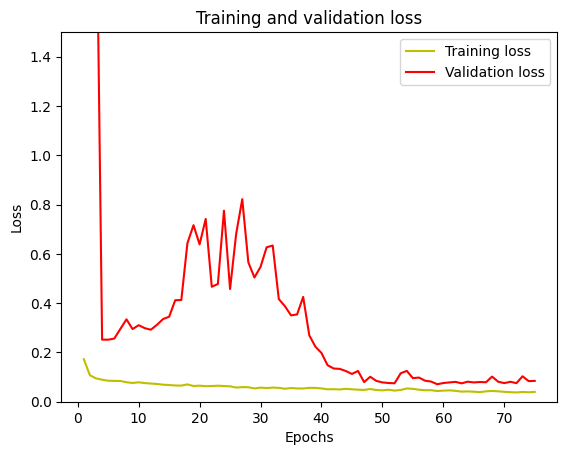

In [ ]:
history = history_CELoss
loss = history_CELoss.history['loss']
val_loss = history_CELoss.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.ylim(bottom=0, top=1.5)
plt.show()

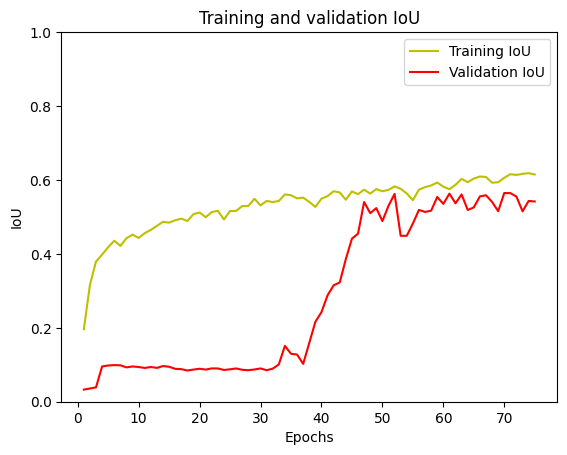

In [ ]:
acc = history.history['iou_score']
val_acc = history.history['val_iou_score']

plt.plot(epochs, acc, 'y', label='Training IoU')
plt.plot(epochs, val_acc, 'r', label='Validation IoU')
plt.title('Training and validation IoU')
plt.xlabel('Epochs')
plt.ylabel('IoU')
plt.legend()
plt.ylim(bottom=0, top=1)
plt.show()

In [ ]:
def display_training(history, name):
    fig, axs = plt.subplots(4, 1, sharex=True)
    
    fig.set_figwidth(15)
    fig.set_figheight(15)
    fig.suptitle(name)
    plt.xlabel('Epochs', fontsize=10)
    
    axs[0].set_title("Training and validation loss")
    axs[0].plot(history.history['loss'])
    axs[0].plot(history.history['val_loss'])
    axs[0].set_ylabel('Loss')
    axs[0].legend(['Training loss', 'Validation loss'], loc="upper right")

    axs[1].set_title("Training and validation accuracy")
    axs[1].plot(history.history['accuracy'])
    axs[1].plot(history.history['val_accuracy'])
    axs[1].set_ylabel('Accuracy')
    axs[1].legend(['Training accuracy', 'Validation accuracy'], loc="lower right")

    axs[2].set_title("Training and validation IOU score")
    axs[2].plot(history.history['iou_score'])
    axs[2].plot(history.history['val_iou_score'])
    axs[2].set_ylabel('IOU score')
    axs[2].legend(['Training IOU score', 'Validation IOU score'], loc="lower right")

    axs[3].set_title("Training and validation F1 score")
    axs[3].plot(history.history['f1-score'])
    axs[3].plot(history.history['val_f1-score'])
    axs[3].set_ylabel('F1 score')
    _  = axs[3].legend(['Training F1 score', 'Validation F1 score'], loc="lower right")

    fig.subplots_adjust(bottom=0.1, top=0.95)

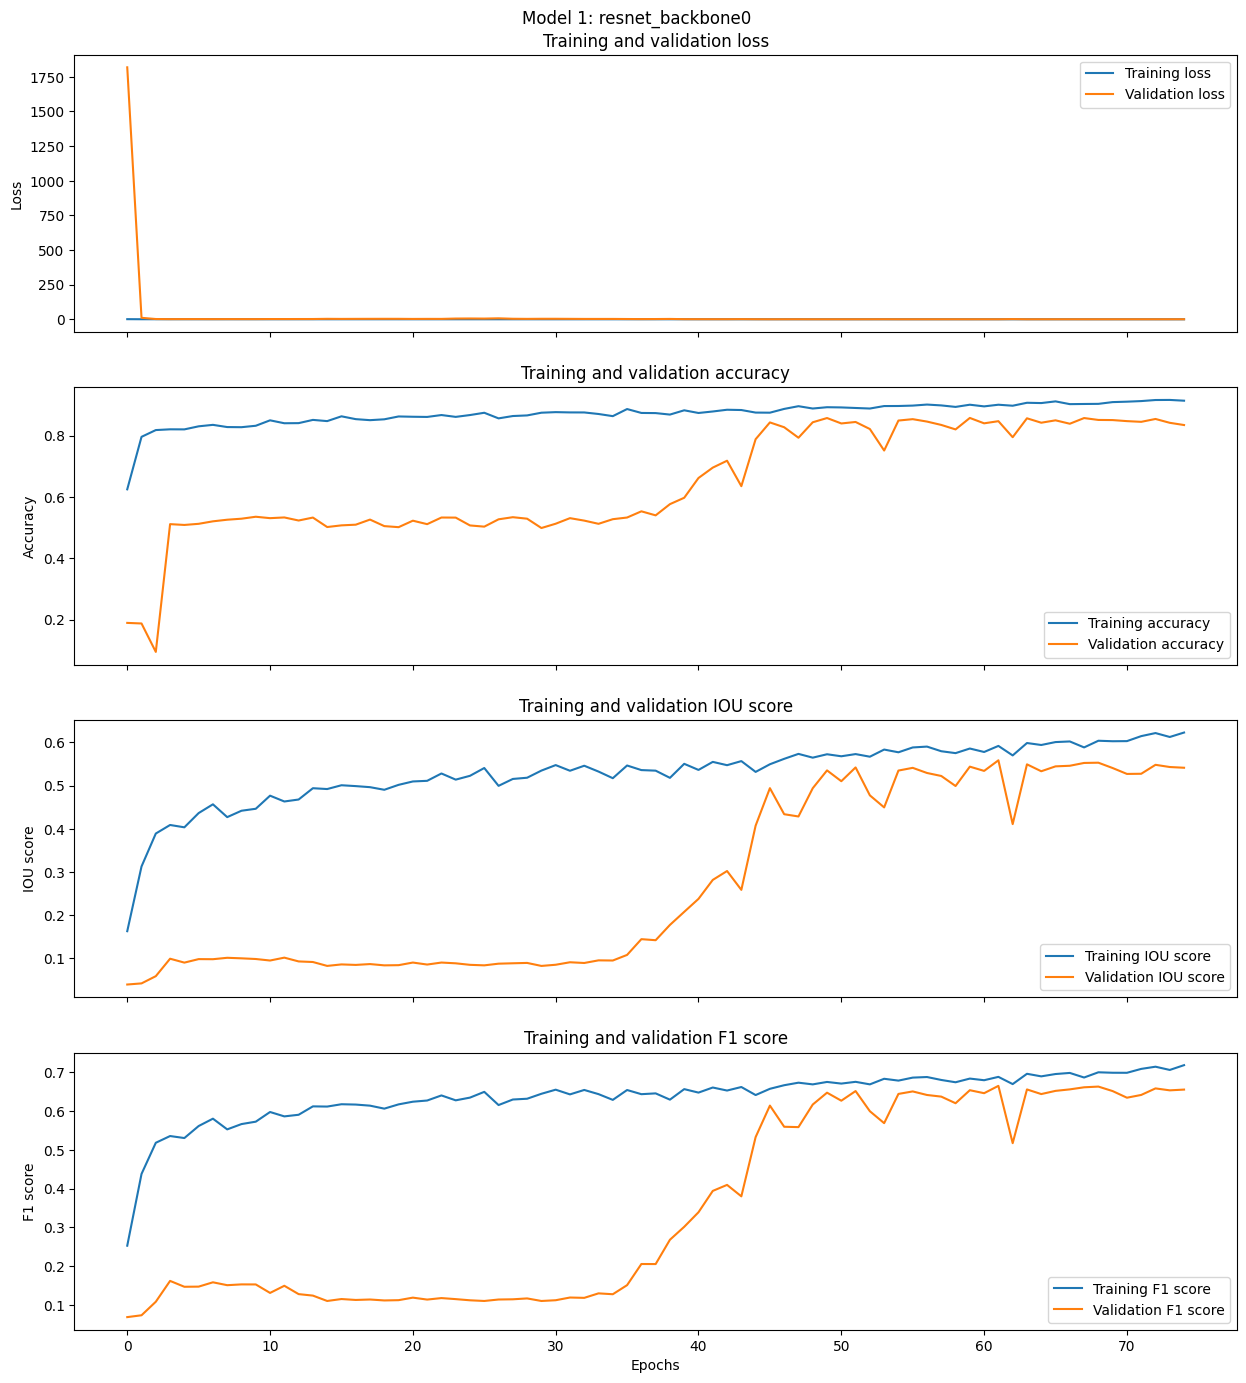

In [ ]:
display_training(history1, 'Model 1: resnet_backbone0')

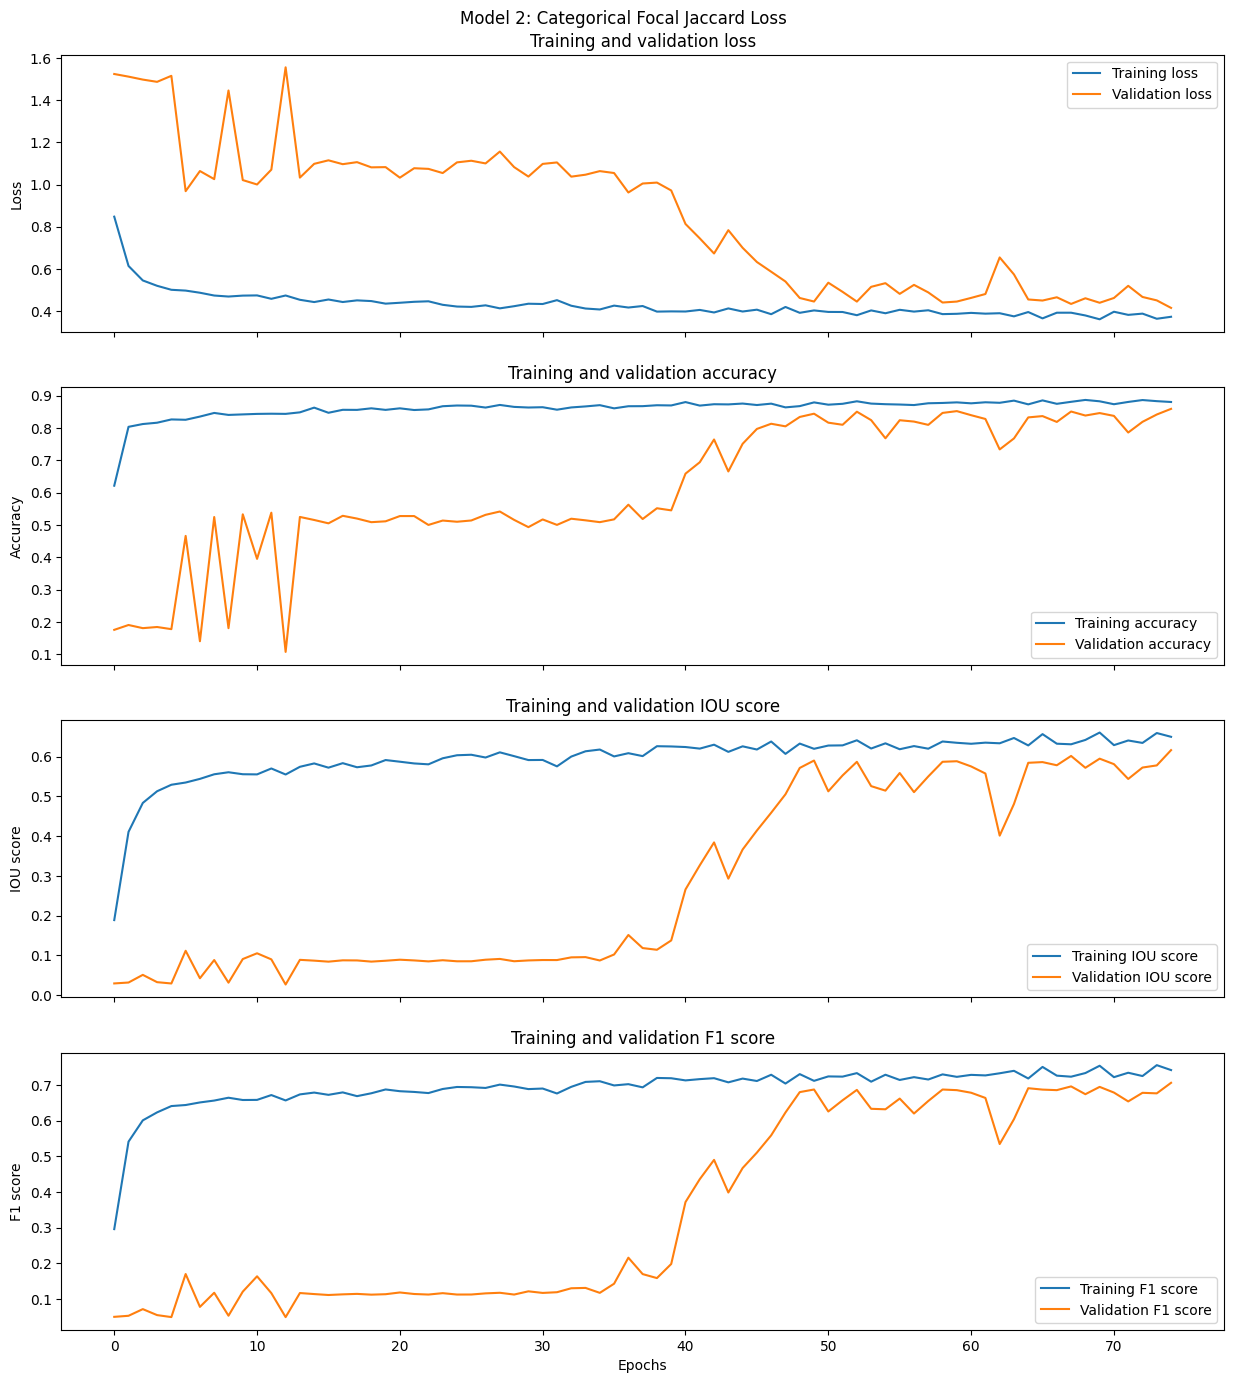

In [ ]:
display_training(history_FocalJL, 'Model 2: Сategorical Focal Jaccard Loss')

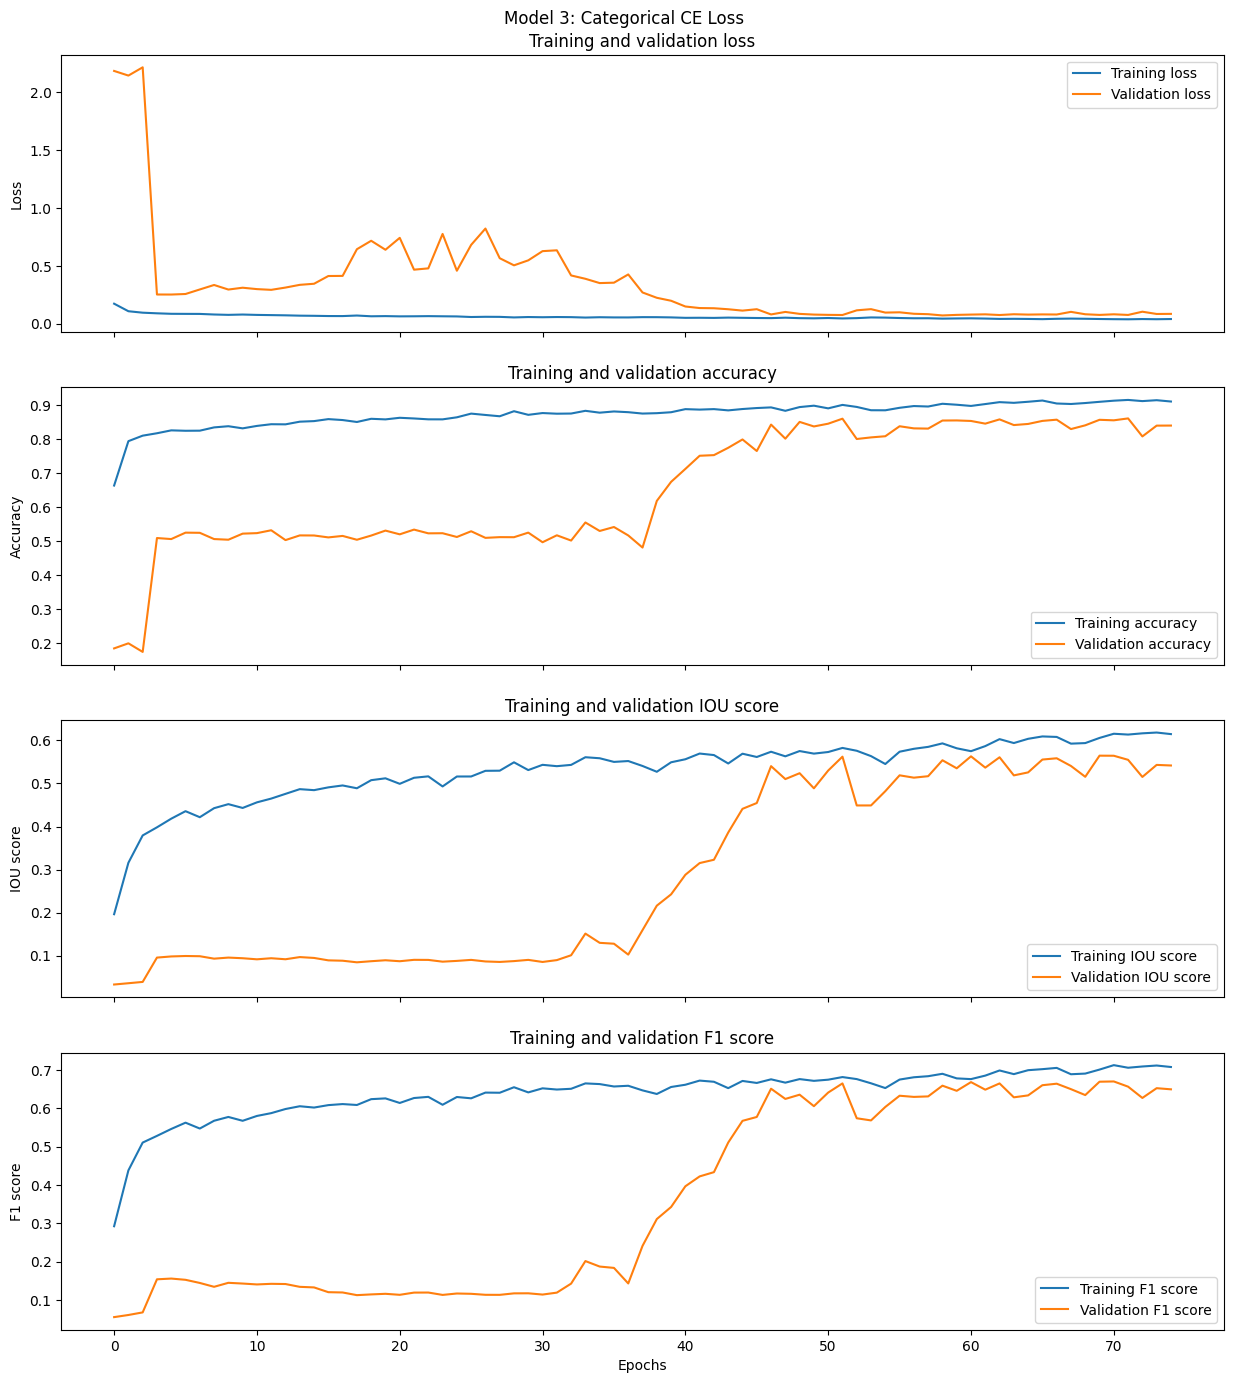

In [ ]:
display_training(history_CELoss, 'Model 3: Categorical CE Loss')

In [ ]:
from keras.models import load_model

model = load_model('/content/drive/MyDrive/ModelZad7.h5', compile=False)

test_image_batch, test_mask_batch = train_img_gen.__next__()
test_mask_batch_argmax = np.argmax(test_mask_batch, axis=3) 
test_pred_batch = model.predict(test_image_batch)
test_pred_batch_argmax = np.argmax(test_pred_batch, axis=3)
n_classes = 6
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(test_pred_batch_argmax, test_mask_batch_argmax)

print("Mean IoU =", IOU_keras.result().numpy()) # https://megaobuchalka.ru/12/10640.html

1/1 [==============================] - 1s 924ms/step
Mean IoU = 0.676166


In [ ]:
# Оценка моделей
from keras.models import load_model

metrics = ['accuracy', sm.metrics.iou_score, sm.metrics.FScore()]
model_1 = load_model('/content/drive/MyDrive/ModelZad7.h5', compile=False)
model_1.compile(metrics=metrics)
test_pred_model_1 = model_1.evaluate(val_img_gen, steps=num_val_images)

model_2 = load_model('/content/drive/MyDrive/ModelZad7(Focal).h5', compile=False)
model_2.compile(metrics=metrics)
test_pred_model_2 = model_2.evaluate(val_img_gen, steps=num_val_images)

model_3 = load_model('/content/drive/MyDrive/ModelZad7(CE).h5', compile=False)
model_3.compile(metrics=metrics)
test_pred_model_3 = model_3.evaluate(val_img_gen, steps=num_val_images)

138/138 [==============================] - 65s 460ms/step - loss: 0.0000e+00 - accuracy: 0.8452 - iou_score: 0.5378 - f1-score: 0.6484


In [ ]:
def print_model_evaluation(model_name, pred):
    print(f'Evaluation of {model_name}')
    print(F"Mean Accuracy = {pred[1]}") 
    print(F"Mean IOU = {pred[2]}") 
    print(F"Mean FScore = {pred[3]}") 
    print()


print_model_evaluation('Model 1: Resnet_Backbone0', test_pred_model_1)
print_model_evaluation('Model 2: Сategorical Focal Jaccard Loss', test_pred_model_2)
print_model_evaluation('Model 3: Categorical CE Loss', test_pred_model_3)

Evaluation of Model 1: Resnet_Backbone0
Mean Accuracy = 0.8416484594345093
Mean IOU = 0.5510023236274719
Mean FScore = 0.6638697981834412

Evaluation of Model 2: Сategorical Focal Jaccard Loss
Mean Accuracy = 0.8572367429733276
Mean IOU = 0.6028544902801514
Mean FScore = 0.6950613260269165

Evaluation of Model 3: Categorical CE Loss
Mean Accuracy = 0.8451777696609497
Mean IOU = 0.5377748608589172
Mean FScore = 0.6484442949295044



In [ ]:
# Отображение результатов

test_image_batch, test_mask_batch = val_img_gen.__next__()
test_mask_batch_argmax = np.argmax(test_mask_batch, axis=3) 

test_pred_batch_model_1 = model_1.predict(test_image_batch)
test_pred_batch_model_2 = model_2.predict(test_image_batch)
test_pred_batch_model_3 = model_3.predict(test_image_batch)

test_pred_batch_model_1_argmax = np.argmax(test_pred_batch_model_1, axis=3)
test_pred_batch_model_2_argmax = np.argmax(test_pred_batch_model_2, axis=3)
test_pred_batch_model_3_argmax = np.argmax(test_pred_batch_model_3, axis=3)

1/1 [==============================] - 1s 894ms/step


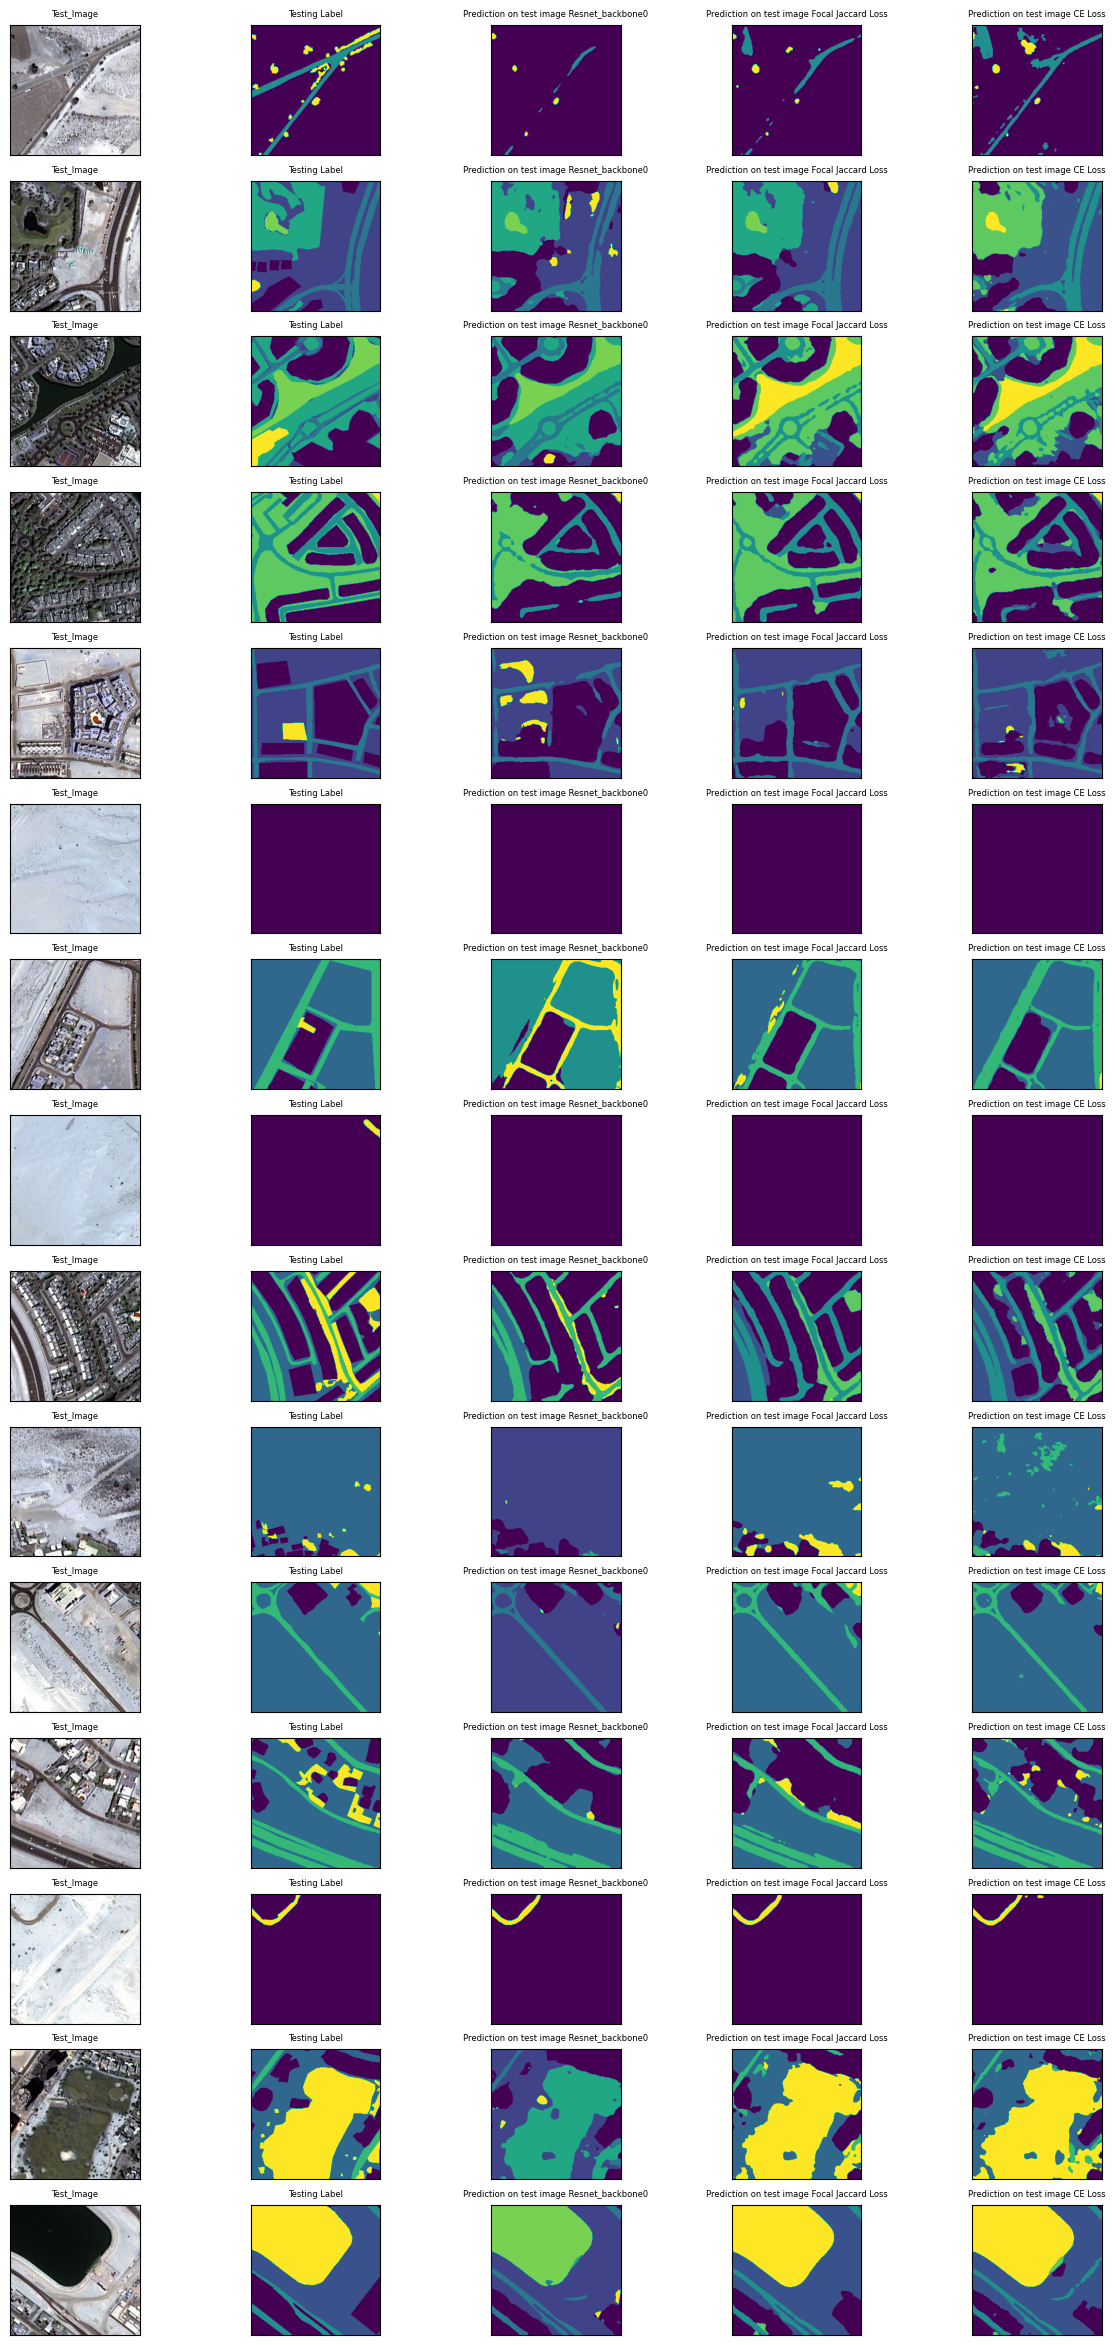

In [ ]:
fig, axis = plt.subplots(test_image_batch.shape[0]-1, 5)
fig.set_figwidth(15)
fig.set_figheight(30)

for img_num in range(test_image_batch.shape[0]-1):   
    
    axis[img_num][0].imshow(test_image_batch[img_num])
    axis[img_num][0].set_title('Test_Image', fontsize = 6)
    axis[img_num][0].axes.xaxis.set_visible(False)
    axis[img_num][0].axes.yaxis.set_visible(False)


    axis[img_num][1].imshow(test_mask_batch_argmax[img_num])
    axis[img_num][1].set_title("Testing Label", fontsize = 6)
    axis[img_num][1].axes.xaxis.set_visible(False)
    axis[img_num][1].axes.yaxis.set_visible(False)

    axis[img_num][2].imshow(test_pred_batch_model_1_argmax[img_num])
    axis[img_num][2].set_title("Prediction on test image Resnet_backbone0", fontsize = 6)
    axis[img_num][2].axes.xaxis.set_visible(False)
    axis[img_num][2].axes.yaxis.set_visible(False)

    axis[img_num][3].imshow(test_pred_batch_model_2_argmax[img_num])
    axis[img_num][3].set_title("Prediction on test image Focal Jaccard Loss", fontsize = 6)
    axis[img_num][3].axes.xaxis.set_visible(False)
    axis[img_num][3].axes.yaxis.set_visible(False)

    axis[img_num][4].imshow(test_pred_batch_model_3_argmax[img_num])
    axis[img_num][4].set_title("Prediction on test image CE Loss", fontsize = 6)
    axis[img_num][4].axes.xaxis.set_visible(False)
    axis[img_num][4].axes.yaxis.set_visible(False)
    
plt.show()